In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [32]:
directory = '/users/gursi/desktop/ml/datasets/weather'

print("Number of cloudy pics : ", len(os.listdir(directory + '/cloudy')))
print("Number of rain pics : ", len(os.listdir(directory + '/rain')))
print("Number of shine pics : ", len(os.listdir(directory + '/shine')))
print("Number of sunrise pics : ", len(os.listdir(directory + '/sunrise')))
print()

total = len(os.listdir(directory + '/cloudy')) + len(os.listdir(directory + '/rain')) + len(os.listdir(directory + '/shine')) + len(os.listdir(directory + '/sunrise'))
print("Total number of images : ", total)

Number of cloudy pics :  303
Number of rain pics :  215
Number of shine pics :  253
Number of sunrise pics :  354

Total number of images :  1125


In [21]:
data_generator = ImageDataGenerator(rescale = 1.0/255.0)
batch_size = 25
classes = ['cloudy','rain','shine','sunrise']

train_data = data_generator.flow_from_directory(directory = directory, target_size = (128,128), batch_size = batch_size,
                                               class_mode = 'categorical', classes = classes)

Found 1125 images belonging to 4 classes.


Order =  ['cloudy', 'rain', 'shine', 'sunrise']


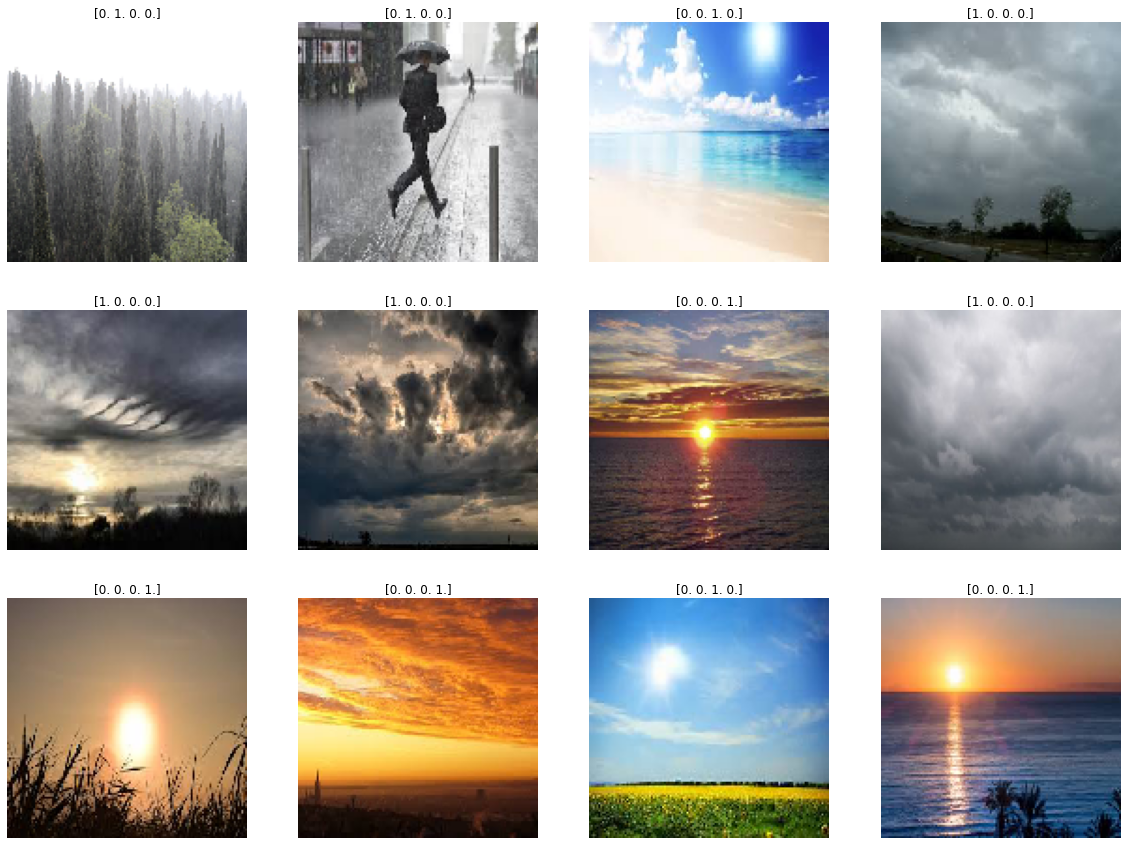

In [26]:
imgs, labels = next(train_data)
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (20,15))
print("Order = ", classes)

img_counter = 0
for var1 in ax :
    for var2 in var1 :
        var2.imshow(imgs[img_counter])
        var2.axis(False)
        var2.set_title(labels[img_counter])
        img_counter = img_counter + 1

In [28]:
print("Shape : ", imgs[0].shape)

Shape :  (128, 128, 3)


In [35]:
model = Sequential()

model.add(Input(shape = (128, 128, 3)))

model.add(Conv2D(32, kernel_size = (3,3), strides = (2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), strides = (2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2)))

model.add(Flatten())
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))

model.add(Dense(len(classes), activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 63, 63, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               627400    
_________________________________________________________________
dense_10 (Dense)             (None, 100)              

In [44]:
fitted_model = model.fit(train_data, epochs = 15, steps_per_epoch = total//batch_size)

Epoch 1/15
45/45 [==============================] - 6s 131ms/step - loss: 0.0850 - accuracy: 0.9671
Epoch 2/15
45/45 [==============================] - 6s 138ms/step - loss: 0.0424 - accuracy: 0.9876
Epoch 3/15
45/45 [==============================] - 7s 148ms/step - loss: 0.0149 - accuracy: 0.9973
Epoch 4/15
45/45 [==============================] - 7s 148ms/step - loss: 0.0224 - accuracy: 0.9947
Epoch 5/15
45/45 [==============================] - 7s 163ms/step - loss: 0.0100 - accuracy: 0.9973
Epoch 6/15
45/45 [==============================] - 7s 164ms/step - loss: 0.0076 - accuracy: 0.9991
Epoch 7/15
45/45 [==============================] - 8s 175ms/step - loss: 0.0054 - accuracy: 0.9991
Epoch 8/15
45/45 [==============================] - 8s 177ms/step - loss: 0.0281 - accuracy: 0.9893
Epoch 9/15
45/45 [==============================] - 8s 181ms/step - loss: 0.0190 - accuracy: 0.9938
Epoch 10/15
45/45 [==============================] - 8s 184ms/step - loss: 0.0107 - accuracy: 0.9964

Final accuracy :  1.0


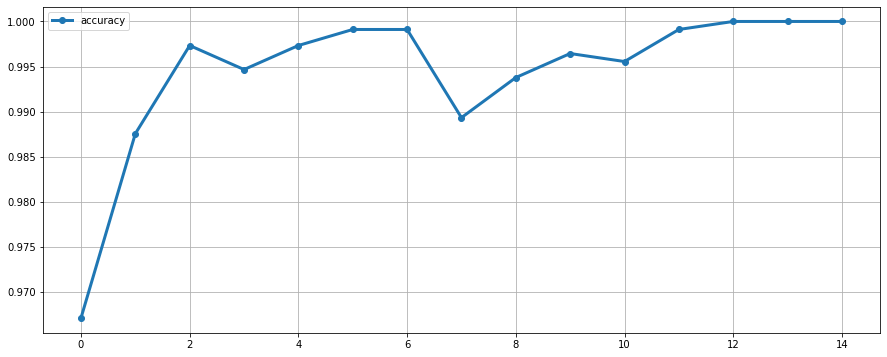

In [53]:
scores = fitted_model.history

print("Final accuracy : ", scores['accuracy'][-1])
plt.figure(figsize = (15,6))
plt.plot(range(len(scores['accuracy'])), scores['accuracy'], linewidth = 3, marker = 'o', label = 'accuracy')
plt.legend()
plt.grid(True)
plt.show()

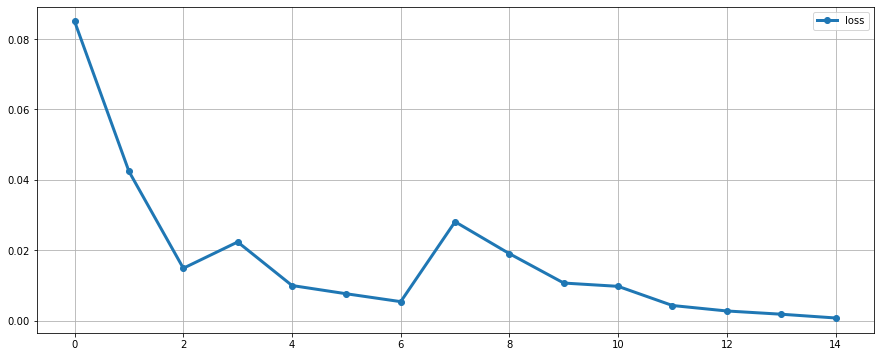

In [52]:
plt.figure(figsize = (15,6))
plt.plot(range(len(scores['loss'])), scores['loss'], linewidth = 3, marker = 'o', label = 'loss')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
# model.save("weather_acc100.h5")